# Decision trees for classification

---

## Importing libraries and data pre-processing

Libraries :
- sklearn
  - Importing breast cancer dataset
  - Splitting dataset into train and test sets
- pandas
  - Dataset is stored as pandas dataframe
- numpy
- matplotlib
  - For visualisation
- Ipython.display
  - For showing pandas Dataframes neatly
- decision_tree
  - Local file that contains the function build_tree, class DecisionNode and other functions

In [1]:
# sklearn for only the dataset, pandas for managing the dataset and numpy for processing
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from time import time

from IPython.display import display
import matplotlib.pyplot as plt

from decision_tree import *

In [2]:
# Select the dataset from options iris, breast_cancer, digits, wine
dataset = 'iris'

data = None

print("Loading dataset '%s'"%dataset)

if(dataset == 'iris'):
    data = load_iris()
elif(dataset == 'breast_cancer'):
    data = load_breast_cancer()
elif(dataset == 'digits'):
    data = load_digits()
elif(dataset == 'wine'):
    data = load_wine()
else:
    print("Invalid dataset selected")

Loading dataset 'iris'


In [3]:
# Processing the dataset
x = data['data']
y = data['target']
col_names = data['feature_names']

# Creating a pandas dataframe from the dataset
x = pd.DataFrame(x, columns=col_names)
x['target'] = y
display(x)

# Getting the types of classes in the data output
tgt_classes = x['target'].unique()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/home/ashwin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


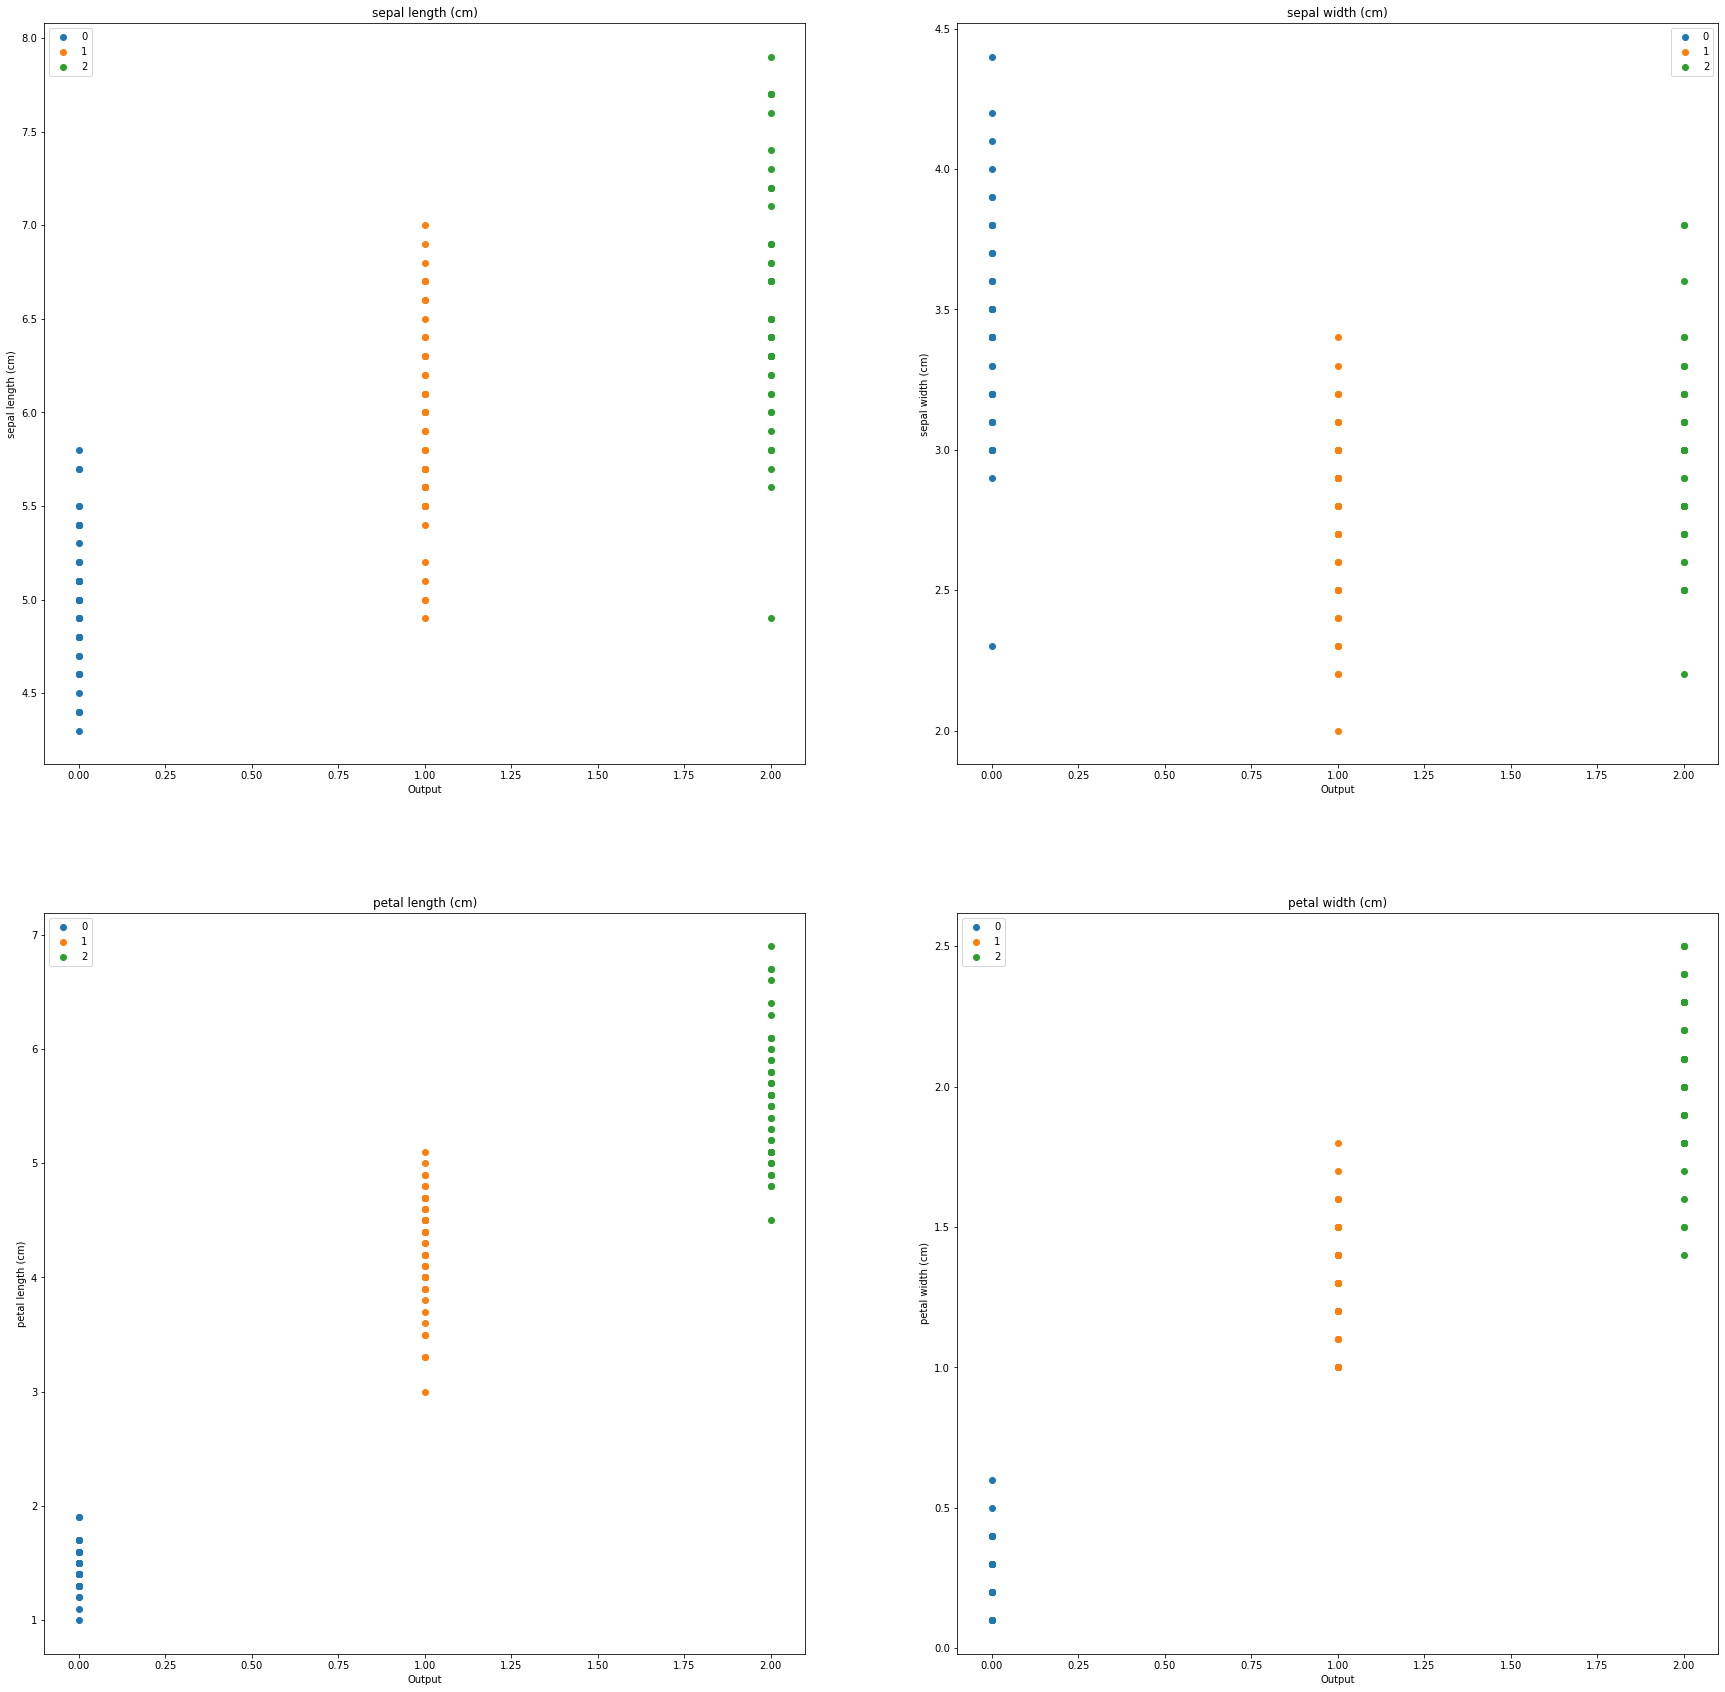

In [4]:
# Visualising the data as scatter plots
col_num = len(col_names)
plt_dim = np.ceil(np.sqrt(col_num))

plt.figure(figsize=(30, 30))

# Dividing data based on output, for coloring seperately
data_target_sorted = {}
for i in tgt_classes:
    data_target_sorted[i] = x.loc[x['target'] == i]

# Plotting the input values v/s target
for i in range(col_num):
    plt.subplot(plt_dim, plt_dim, i+1)
    plt.title(col_names[i])
    plt.ylabel(col_names[i])
    plt.xlabel('Output')
    for j in tgt_classes:
        data_target_j = data_target_sorted[j]
        plt.scatter(data_target_j['target'], data_target_j[col_names[i]])
    plt.legend(tgt_classes)

plt.show()

In [5]:
# Splitting the dataset
split_ratio = 0.1
train, test = train_test_split(x, test_size=int(x.shape[0]*0.1))

In [11]:
# The level is the maximum number of decision nodes from root to the end (excluding leaf nodes)
tick = time()
root = build_tree(train, 3, debug=True)
print(" Fitting data took %.3f seconds"%(time()-tick))

            root : Initialised node with level :  0
            root : Trained. Impurity before : 0.67, Impurity : 0.34, Column : 'petal length (cm)', Threshold : 2.45
            root : Making children nodes...
           root+ : Initialised node with level :  1
           root- : Initialised node with level :  1
            root : Splitting input...
           root+ : Trained. Impurity before : 0.50, Impurity : 0.12, Column : 'petal width (cm)', Threshold : 1.75
           root+ : Making children nodes...
          root++ : Initialised node with level :  2
          root+- : Initialised node with level :  2
           root+ : Splitting input...
          root++ : Trained. Impurity before : 0.05, Impurity : 0.04, Column : 'sepal length (cm)', Threshold : 5.95
          root++ : Making children nodes...
         root+++ : Initialised node with level :  3
         root++- : Initialised node with level :  3
          root++ : Splitting input...
         root+++ : Made into leaf node, wit

In [12]:
num_samples = 5

for i in np.random.choice(test.shape[0], num_samples, replace=False):
    print(" Testing on a sample : test set index '%d'"%i)
    display(test.iloc[i])
    result = root.classify(test.iloc[i])
    print()
    print(" Classification result : %d, Label : %d" % (result, test.iloc[i]['target']))
    print()
    
root.set_debug(False, propagate=True)

 Testing on a sample : test set index '1'


sepal length (cm)    4.4
sepal width (cm)     2.9
petal length (cm)    1.4
petal width (cm)     0.2
target               0.0
Name: 8, dtype: float64

            root : Classifying criteria - petal length (cm) >= 2.45
            root : Moving to lower node
           root- : Leaf node - returning result 0

 Classification result : 0, Label : 0

 Testing on a sample : test set index '0'


sepal length (cm)    6.5
sepal width (cm)     2.8
petal length (cm)    4.6
petal width (cm)     1.5
target               1.0
Name: 54, dtype: float64

            root : Classifying criteria - petal length (cm) >= 2.45
            root : Moving to upper node
           root+ : Classifying criteria - petal width (cm) >= 1.75
           root+ : Moving to lower node
          root+- : Classifying criteria - sepal length (cm) >= 7.10
          root+- : Moving to lower node
         root+-- : Leaf node - returning result 1

 Classification result : 1, Label : 1

 Testing on a sample : test set index '12'


sepal length (cm)    5.3
sepal width (cm)     3.7
petal length (cm)    1.5
petal width (cm)     0.2
target               0.0
Name: 48, dtype: float64

            root : Classifying criteria - petal length (cm) >= 2.45
            root : Moving to lower node
           root- : Leaf node - returning result 0

 Classification result : 0, Label : 0

 Testing on a sample : test set index '14'


sepal length (cm)    5.7
sepal width (cm)     3.0
petal length (cm)    4.2
petal width (cm)     1.2
target               1.0
Name: 95, dtype: float64

            root : Classifying criteria - petal length (cm) >= 2.45
            root : Moving to upper node
           root+ : Classifying criteria - petal width (cm) >= 1.75
           root+ : Moving to lower node
          root+- : Classifying criteria - sepal length (cm) >= 7.10
          root+- : Moving to lower node
         root+-- : Leaf node - returning result 1

 Classification result : 1, Label : 1

 Testing on a sample : test set index '6'


sepal length (cm)    4.5
sepal width (cm)     2.3
petal length (cm)    1.3
petal width (cm)     0.3
target               0.0
Name: 41, dtype: float64

            root : Classifying criteria - petal length (cm) >= 2.45
            root : Moving to lower node
           root- : Leaf node - returning result 0

 Classification result : 0, Label : 0

            root : Setting debug to False
           root+ : Setting debug to False
          root++ : Setting debug to False
         root+++ : Setting debug to False
         root++- : Setting debug to False
          root+- : Setting debug to False
         root+-+ : Setting debug to False
         root+-- : Setting debug to False
           root- : Setting debug to False


In [13]:
error = 0

for i in test.index:
    inp = test.loc[i]
    out = root.classify(inp)
    if(out != inp['target']):
        error = error+1

total = test.shape[0]
print(" Test set accuracy  : %4d/%4d - %.2f%%" % (total-error,total, 100*(total - error)/total))

error = 0

for i in train.index:
    inp = train.loc[i]
    out = root.classify(inp)
    if(out != inp['target']):
        error = error+1

total = train.shape[0]
print(" Train set accuracy : %4d/%4d - %.2f%%" % (total-error,total, 100*(total - error)/total))

 Test set accuracy  :   15/  15 - 100.00%
 Train set accuracy :  130/ 135 - 96.30%


/home/ashwin/Projects/ML_Projects/decision_trees/decision_tree.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 Saving output as ./Images/iris_decisiontree


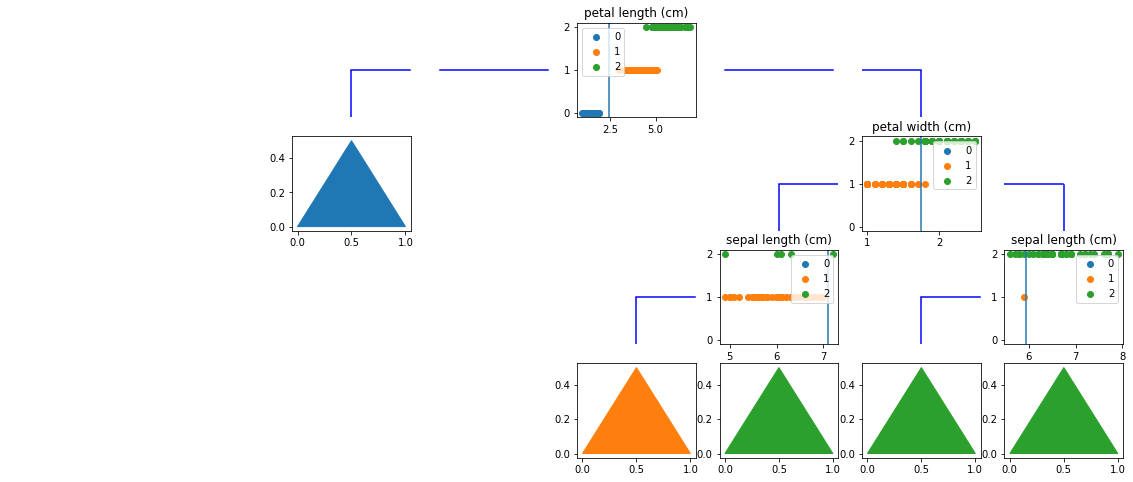

In [14]:
visualize_tree_working(x, root, 3, save="./Images/%s_decisiontree"%dataset)

## Interpreting the above diagram

Triangles are leaf nodes with color denoting output. The scatter plots are decision nodes, with the data and threshold (as a line) plotted. The upper child node of a node is displayed one level below and towards the right, and the lower child node is displayed directly below the node.